<a href="https://colab.research.google.com/github/kabeerbora/ECON5625/blob/main/DAGs_Lecture_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib dowhy pywhy

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# DAGs

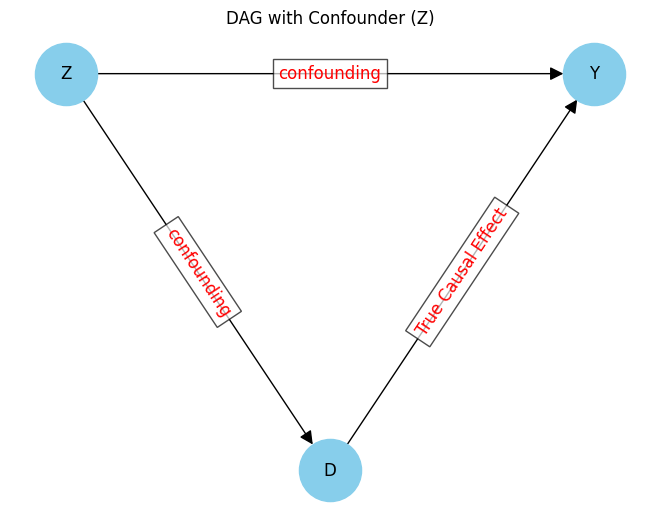

In [ ]:
G = nx.DiGraph()
G.add_edges_from([
    ("D", "Y"),    # X → Y
    ("Z", "D"),    # Z → X
    ("Z", "Y")     # Z → Y
])

pos = {"Z": (0, 1), "D": (1, 0), "Y": (2, 1)}
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", arrowsize=20)
edge_labels = {
    ("Z", "D"): "confounding",
    ("Z", "Y"): "confounding",
    ("D", "Y"): "True Causal Effect"
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                             font_color="red", font_size=12,
                             label_pos=0.5, bbox=dict(facecolor='white', alpha=0.7))

plt.title("DAG with Confounder (Z)")
plt.show()

## Becker's DAG

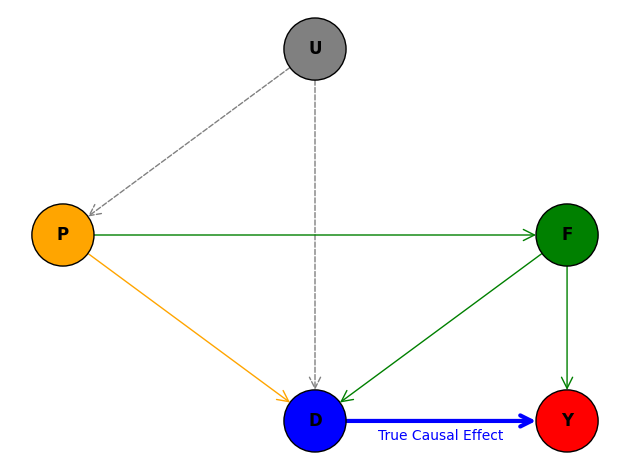

In [ ]:
G = nx.DiGraph()
G.add_node("U", color="gray", label="U")
G.add_node("P", color="orange", label="P")
G.add_node("F", color="green", label="F")
G.add_node("D", color="blue", label="D")
G.add_node("Y", color="red", label="Y")

G.add_edge("U", "P", color="gray", style="dashed")
G.add_edge("U", "D", color="gray", style="dashed")
G.add_edge("P", "D", color="orange", style="solid")
G.add_edge("P", "F", color="green", style="solid")
G.add_edge("F", "D", color="green", style="solid")
G.add_edge("F", "Y", color="green", style="solid")
G.add_edge("D", "Y", color="blue", style="solid", weight=3)

pos = {
    "U": (0, 1),
    "P": (-1, 0),
    "F": (1, 0),
    "D": (0, -1),
    "Y": (1, -1)
}
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors,
                      edgecolors="black", linewidths=1)
for (u, v, data) in G.edges(data=True):
    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)],
        edge_color=data['color'],
        style=data['style'],
        width=data.get('weight', 1),
        arrows=True,
        arrowstyle='->,head_width=0.4,head_length=0.8',
        node_size=2000
    )
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
plt.text(0.5, -1.1, "True Causal Effect", color='blue', fontsize=10, ha='center')
plt.axis('off')
plt.tight_layout()
plt.show()

In [43]:
import statsmodels.api as sm
import numpy as np

# Simulate data with confounder (ability) and multicollinearity
np.random.seed(42)
ability = np.random.normal(0, 1, 1000)
education = 0.8 * ability + np.random.normal(0, 0.2, 1000)
earnings = 0.5 * education + 0.7 * ability + np.random.normal(0, 1, 1000)

# Regression with multicollinearity
X = sm.add_constant(np.column_stack([education, ability]))
model = sm.OLS(earnings, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     622.4
Date:                Sat, 19 Jul 2025   Prob (F-statistic):          3.86e-176
Time:                        09:21:58   Log-Likelihood:                -1401.5
No. Observations:                1000   AIC:                             2809.
Df Residuals:                     997   BIC:                             2824.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.031      0.197      0.8

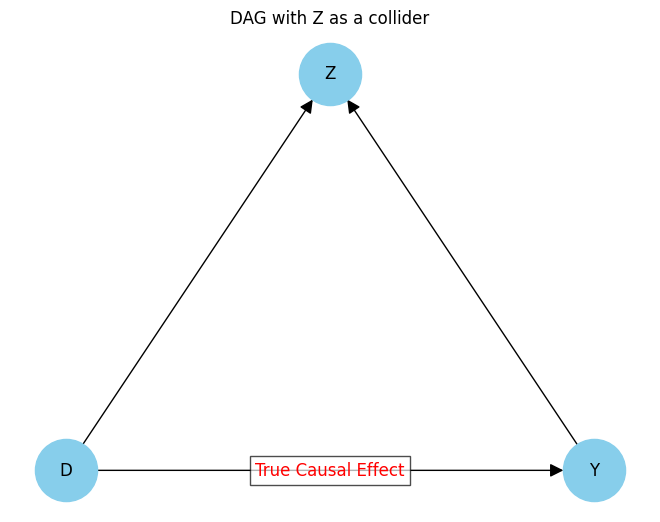

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ("D", "Z"),
    ("Y", "Z"),
    ("D", "Y")
])

pos = {
    "D": (0, 0),
    "Y": (2, 0),
    "Z": (1, 1)
}

nx.draw(G, pos, with_labels=True, node_size=2000,
        node_color="skyblue", arrowsize=20)

edge_labels = {
    ("D", "Z"): "",
    ("Y", "Z"): "",
    ("D", "Y"): "True Causal Effect"
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                             font_color="red", font_size=12,
                             label_pos=0.5,
                             bbox=dict(facecolor='white', alpha=0.7))

plt.title("DAG with Z as a collider")
plt.show()

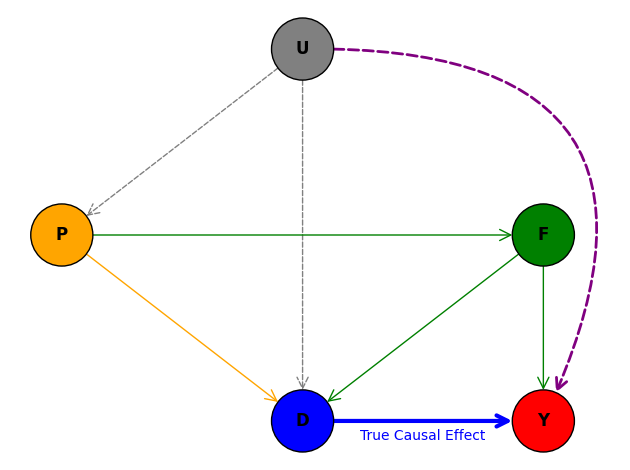

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the Directed Acyclic Graph (DAG)
G = nx.DiGraph()
G.add_node("U", color="gray", label="U")
G.add_node("P", color="orange", label="P")
G.add_node("F", color="green", label="F")
G.add_node("D", color="blue", label="D")
G.add_node("Y", color="red", label="Y")

G.add_edge("U", "P", color="gray", style="dashed")
G.add_edge("U", "D", color="gray", style="dashed")
G.add_edge("P", "D", color="orange", style="solid")
G.add_edge("P", "F", color="green", style="solid")
G.add_edge("F", "D", color="green", style="solid")
G.add_edge("F", "Y", color="green", style="solid")
G.add_edge("D", "Y", color="blue", style="solid", weight=3)

# Define positions
pos = {
    "U": (0, 1),
    "P": (-1, 0),
    "F": (1, 0),
    "D": (0, -1),
    "Y": (1, -1)
}

# Draw nodes and existing edges
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors,
                      edgecolors="black", linewidths=1)
for (u, v, data) in G.edges(data=True):
    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)],
        edge_color=data['color'],
        style=data['style'],
        width=data.get('weight', 1),
        arrows=True,
        arrowstyle='->,head_width=0.4,head_length=0.8',
        node_size=2000
    )

# Draw a curved edge from U to Y (going around the DAG)
nx.draw_networkx_edges(
    G, pos,
    edgelist=[("U", "Y")],
    edge_color="purple",
    style="dashed",
    width=2,
    arrows=True,
    arrowstyle='->,head_width=0.4,head_length=0.8',
    connectionstyle="arc3,rad=-0.8",  # Adjust 'rad' for curvature
    node_size=2000
)

nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
plt.text(0.5, -1.1, "True Causal Effect", color='blue', fontsize=10, ha='center')
plt.axis('off')
plt.tight_layout()
plt.show()

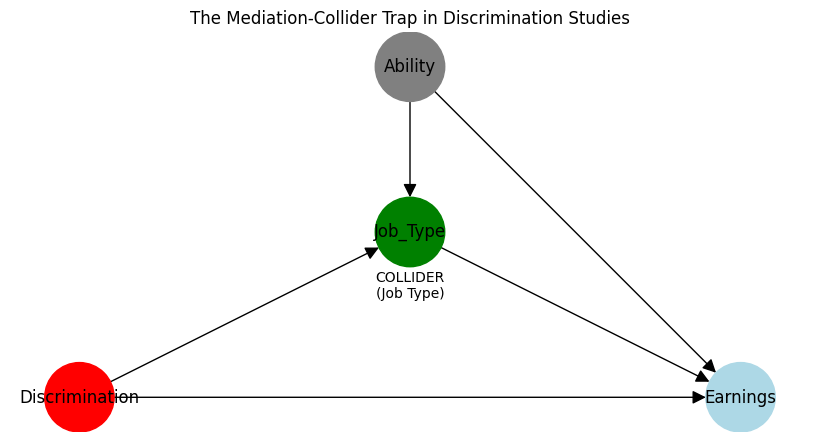

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the DAG
G = nx.DiGraph()
G.add_edges_from([
    ("Discrimination", "Earnings"),  # Direct effect
    ("Discrimination", "Job_Type"),  # Mediation path
    ("Job_Type", "Earnings"),       # Mediation path
    ("Ability", "Job_Type"),        # Hidden bias
    ("Ability", "Earnings")         # Hidden bias
])

# Draw with collider highlighted
pos = {
    "Discrimination": (0, 0),
    "Job_Type": (1, 0.5),  # Collider
    "Earnings": (2, 0),
    "Ability": (1, 1)
}

plt.figure(figsize=(8,4))
nx.draw(G, pos, with_labels=True, node_size=2500,
        node_color=["red", "lightblue", "green", "gray"],
        arrowsize=20)

plt.text(1, 0.3, "COLLIDER\n(Job Type)", ha='center')
plt.title("The Mediation-Collider Trap in Discrimination Studies")
plt.show()